<a href="https://colab.research.google.com/github/brunotagoncalves/bimbo-compassers/blob/main/kaggle_api_2st_read.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook para Download e Leitura Inicial de Arquivos 


1) Instalação e Download de Arquivos Kaggle

In [1]:
# Podem  ocorrrer falhas de instalação como lxml, mas isso não atrapalha o restante do código
!pip install -q kaggle
!pip install -q kaggle-cli

     |████████████████████████████████| 81kB 3.9MB/s 
     |████████████████████████████████| 4.2MB 10.5MB/s 
     |████████████████████████████████| 51kB 5.0MB/s 
     |████████████████████████████████| 112kB 49.7MB/s 
     |████████████████████████████████| 143kB 50.3MB/s 
  ERROR: Failed building wheel for lxml
    Running setup.py install for lxml ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-w0s8dnns/lxml/setup.py'"'"'; __file__='"'"'/tmp/pip-install-w0s8dnns/lxml/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-2qinw_hv/install-record.txt --single-version-externally-managed --compile Check the logs for full command output.


In [2]:
# Alterando arquivo de config do Kaggle com dados pessoais https://www.kaggle.com/"username"/account  crie um token pessoal no botão "create new api token"
!mkdir ~/.kaggle
!echo '{"username":"bruno9tg","key":"656f29061b3fcda2f8c1541f3492f24d"}' > ../root/.kaggle/kaggle.json

In [3]:
#utiliza api kaggle para realizar download
#!kaggle competitions download -c grupo-bimbo-inventory-demand
!kaggle competitions download -p data/ grupo-bimbo-inventory-demand

  0% 0.00/31.5k [00:00<?, ?B/s]
100% 31.5k/31.5k [00:00<00:00, 12.1MB/s]
 85% 73.0M/85.8M [00:00<00:00, 90.8MB/s]
100% 85.8M/85.8M [00:00<00:00, 134MB/s] 
  0% 0.00/6.35k [00:00<?, ?B/s]
100% 6.35k/6.35k [00:00<00:00, 6.17MB/s]
100% 14.8M/14.8M [00:00<00:00, 151MB/s]

  0% 0.00/5.87M [00:00<?, ?B/s]
100% 5.87M/5.87M [00:00<00:00, 50.1MB/s]
100% 371M/373M [00:02<00:00, 146MB/s]
100% 373M/373M [00:03<00:00, 130MB/s]


2) Leitura básica dos arquivos

In [1]:
import pandas as pd 

In [5]:
!ls data/

cliente_tabla.csv.zip	sample_submission.csv.zip  town_state.csv.zip
producto_tabla.csv.zip	test.csv.zip		   train.csv.zip


In [6]:
pd.read_csv('data/cliente_tabla.csv.zip').head()

,Cliente_ID,NombreCliente
0,0,SIN NOMBRE
1,1,OXXO XINANTECATL
2,2,SIN NOMBRE
3,3,EL MORENO
4,4,SDN SER DE ALIM CUERPO SA CIA DE INT


In [7]:
pd.read_csv('data/producto_tabla.csv.zip').head()

,Producto_ID,NombreProducto
0,0,NO IDENTIFICADO 0
1,9,Capuccino Moka 750g NES 9
2,41,Bimbollos Ext sAjonjoli 6p 480g BIM 41
3,53,Burritos Sincro 170g CU LON 53
4,72,Div Tira Mini Doradita 4p 45g TR 72


In [8]:
pd.read_csv('data/sample_submission.csv.zip').head()

,id,Demanda_uni_equil
0,0,7
1,1,7
2,2,7
3,3,7
4,4,7


In [9]:
pd.read_csv('data/test.csv.zip').head()

,id,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
0,0,11,4037,1,2209,4639078,35305
1,1,11,2237,1,1226,4705135,1238
2,2,10,2045,1,2831,4549769,32940
3,3,11,1227,1,4448,4717855,43066
4,4,11,1219,1,1130,966351,1277


In [10]:
pd.read_csv('data/test.csv.zip').groupby('Semana').count()

,id,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID
Semana,,,,,,
10,3538385,3538385,3538385,3538385,3538385,3538385
11,3460866,3460866,3460866,3460866,3460866,3460866


In [11]:
pd.read_csv('data/town_state.csv.zip').head()

,Agencia_ID,Town,State
0,1110,2008 AG. LAGO FILT,"MÉXICO, D.F."
1,1111,2002 AG. AZCAPOTZALCO,"MÉXICO, D.F."
2,1112,2004 AG. CUAUTITLAN,ESTADO DE MÉXICO
3,1113,2008 AG. LAGO FILT,"MÉXICO, D.F."
4,1114,2029 AG.IZTAPALAPA 2,"MÉXICO, D.F."


In [12]:
# Para os dados de treino o volume já excede a memoria do Colab usar a função iterator se faz necessário.
sample_train = pd.read_csv('data/train.csv.zip', nrows=1000)
sample_train

,Semana,Agencia_ID,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil
0,3,1110,7,3301,15766,1212,3,25.14,0,0.0,3
1,3,1110,7,3301,15766,1216,4,33.52,0,0.0,4
2,3,1110,7,3301,15766,1238,4,39.32,0,0.0,4
3,3,1110,7,3301,15766,1240,4,33.52,0,0.0,4
4,3,1110,7,3301,15766,1242,3,22.92,0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...
995,3,1110,7,3303,1453543,1250,25,191.00,0,0.0,25
996,3,1110,7,3303,1453543,1309,6,40.56,0,0.0,6
997,3,1110,7,3303,1453543,3270,1,10.47,0,0.0,1
998,3,1110,7,3303,1453543,4270,2,16.76,0,0.0,2


3) Instalação de Leitura com SPARK

In [13]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#!wget http://www-eu.apache.org/dist/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz 
!wget -P spark_tgz/ http://www-eu.apache.org/dist/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz 

--2021-06-15 19:52:50--  http://www-eu.apache.org/dist/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
Resolving www-eu.apache.org (www-eu.apache.org)... 95.216.26.30, 2a01:4f9:2a:1a61::2
Connecting to www-eu.apache.org (www-eu.apache.org)|95.216.26.30|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://downloads.apache.org/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz [following]
--2021-06-15 19:52:50--  https://downloads.apache.org/spark/spark-2.4.8/spark-2.4.8-bin-hadoop2.7.tgz
Resolving downloads.apache.org (downloads.apache.org)... 88.99.95.219, 135.181.209.10, 135.181.214.104, ...
Connecting to downloads.apache.org (downloads.apache.org)|88.99.95.219|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235899716 (225M) [application/x-gzip]
Saving to: ‘spark_tgz/spark-2.4.8-bin-hadoop2.7.tgz’

spark-2.4.8-bin-had 100%[===================>] 224.97M  26.0MB/s    in 9.3s    

2021-06-15 19:53:00 (24.3 MB/s) - ‘spark_tgz/spark-2

In [14]:
!tar -xf spark_tgz/spark-2.4.8-bin-hadoop2.7.tgz -C spark_tgz/
!pip install -q findspark
!pip install -q pyspark

     |████████████████████████████████| 212.4MB 67kB/s 
     |████████████████████████████████| 204kB 19.5MB/s 


In [2]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark_tgz/spark-2.4.8-bin-hadoop2.7"

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [17]:
!unzip 'data/*.zip' -d 'data/'

Archive:  data/sample_submission.csv.zip
  inflating: data/sample_submission.csv  

Archive:  data/producto_tabla.csv.zip
  inflating: data/producto_tabla.csv  

Archive:  data/train.csv.zip
  inflating: data/train.csv          

Archive:  data/town_state.csv.zip
  inflating: data/town_state.csv     

Archive:  data/cliente_tabla.csv.zip
  inflating: data/cliente_tabla.csv  

Archive:  data/test.csv.zip
  inflating: data/test.csv           

6 archives were successfully processed.


In [ ]:
df = spark.read.format('csv').option("header", "True").load("data/train.csv")

In [19]:
%%time
df.count()

CPU times: user 166 ms, sys: 18.3 ms, total: 185 ms
Wall time: 34.7 s


74180464

In [20]:
g_df_Semana= df.groupBy('Semana').count().toPandas()

In [21]:
g_df_Semana.loc[:,'percent'] = g_df_Semana['count']/g_df_Semana['count'].sum()

In [22]:
g_df_Semana.sort_values('Semana')

,Semana,count,percent
1,3,11165207,0.150514
6,4,11009593,0.148416
3,5,10615397,0.143102
4,6,10191837,0.137392
0,7,10382849,0.139967
2,8,10406868,0.140291
5,9,10408713,0.140316


# Relacionando tabelas 

In [23]:
!ls data/*.csv

data/cliente_tabla.csv	 data/sample_submission.csv  data/town_state.csv
data/producto_tabla.csv  data/test.csv		     data/train.csv


In [4]:
spark.read.format('csv').option("header", "True").load("data/cliente_tabla.csv").createOrReplaceTempView('cliente_tabla') 
spark.read.format('csv').option("header", "True").load("data/sample_submission.csv").createOrReplaceTempView('sample_submission') 
spark.read.format('csv').option("header", "True").load("data/town_state.csv").createOrReplaceTempView('town_state') 
spark.read.format('csv').option("header", "True").load("data/producto_tabla.csv").createOrReplaceTempView('producto_tabla') 
spark.read.format('csv').option("header", "True").load("data/test.csv").createOrReplaceTempView('test') 
spark.read.format('csv').option("header", "True").load("data/train.csv").createOrReplaceTempView('train') 

In [5]:
df = spark.sql("""
SELECT train.*
--  , cliente_tabla.NombreCliente 
  , producto_tabla.NombreProducto
  , town_state.Town
  , town_state.State
FROM train
--LEFT JOIN cliente_tabla 
--  on train.Cliente_ID = cliente_tabla.Cliente_ID
LEFT JOIN producto_tabla
  on train.Producto_ID = producto_tabla.Producto_ID
LEFT JOIN town_state
  on train.Agencia_ID = town_state.Agencia_ID  
""")
#.write.mode('overwrite').format('parquet').save('data/tabelao/')

In [26]:
df.write.partitionBy(["Agencia_ID"]).mode('overwrite').format('parquet').save('data/tabelao/')

In [4]:
df = spark.read.format('parquet').load('data/tabelao/')

In [5]:
%%time
df.count()

CPU times: user 51.4 ms, sys: 5.36 ms, total: 56.7 ms
Wall time: 8.61 s


74180464

In [6]:
df.limit(5).toPandas()

,Semana,Canal_ID,Ruta_SAK,Cliente_ID,Producto_ID,Venta_uni_hoy,Venta_hoy,Dev_uni_proxima,Dev_proxima,Demanda_uni_equil,NombreProducto,Town,State,Agencia_ID
0,3,1,2135,93492,43058,1,9.35,0,0.0,1,Sponch 8p 120g MTB MLA 43058,2309 NORTE,JALISCO,1911
1,3,1,1007,90938,1109,1,15.01,0,0.0,1,Pan Blanco Chico 360g BIM 1109,2309 NORTE,JALISCO,1911
2,3,1,2135,93567,30549,2,10.76,0,0.0,2,Suavicremas Chocolate 84g MTA MLA 30549,2309 NORTE,JALISCO,1911
3,3,1,1007,90938,1125,8,76.8,0,0.0,8,Tortillinas 10p 255g TR 1125,2309 NORTE,JALISCO,1911
4,3,1,2135,93567,30572,7,43.75,0,0.0,7,Barritas Fresa 67g Prom MTB MLA 30572,2309 NORTE,JALISCO,1911


In [6]:
df.createOrReplaceTempView('tabelao')

In [9]:
spark.sql("""
SELECT *
  --,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) SUM_Town_Prod_Demanda_uni_equil
  --,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) AVG_Town_Prod_Demanda_uni_equil
  --,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) MIN_Town_Prod_Demanda_uni_equil
  --,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) MAX_Town_Prod_Demanda_uni_equil

  --,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) SUM_Town_Demanda_uni_equil
  --,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) AVG_Town_Demanda_uni_equil
  --,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) MIN_Town_Demanda_uni_equil
  --,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) MAX_Town_Demanda_uni_equil

  --,SUM(Demanda_uni_equil) OVER (PARTITION BY State) SUM_State_Demanda_uni_equil
  --,AVG(Demanda_uni_equil) OVER (PARTITION BY State) AVG_State_Demanda_uni_equil
  --,MIN(Demanda_uni_equil) OVER (PARTITION BY State) MIN_State_Demanda_uni_equil
  --,MAX(Demanda_uni_equil) OVER (PARTITION BY State) MAX_State_Demanda_uni_equil

  --,SUM(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) SUM_State_Prod_Demanda_uni_equil
  --,AVG(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) AVG_State_Prod_Demanda_uni_equil
  --,MIN(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) MIN_State_Prod_Demanda_uni_equil
  --,MAX(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) MAX_State_Prod_Demanda_uni_equil

  --,SUM(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) SUM_Prod_Demanda_uni_equil
  --,AVG(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) AVG_Prod_Demanda_uni_equil
  --,MIN(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) MIN_Prod_Demanda_uni_equil
  --,MAX(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) MAX_Prod_Demanda_uni_equil

  --,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) SUM_Cliente_Demanda_uni_equil
  --,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) AVG_Cliente_Demanda_uni_equil
  --,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) MIN_Cliente_Demanda_uni_equil
  --,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) MAX_Cliente_Demanda_uni_equil

  --,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) SUM_Cliente_Prod_Demanda_uni_equil
  --,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) AVG_Cliente_Prod_Demanda_uni_equil
  --,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) MIN_Cliente_Prod_Demanda_uni_equil
  --,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) MAX_Cliente_Prod_Demanda_uni_equil
  
  ,LAG(Demanda_uni_equil,1) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_1_Cliente_Prod_Demanda_uni_equil
  ,LAG(Demanda_uni_equil,2) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_2_Cliente_Prod_Demanda_uni_equil
  ,LAG(Demanda_uni_equil,3) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_3_Cliente_Prod_Demanda_uni_equil
  ,LAG(Demanda_uni_equil,4) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_4_Cliente_Prod_Demanda_uni_equil
  ,LAG(Demanda_uni_equil,5) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_5_Cliente_Prod_Demanda_uni_equil
 
FROM tabelao
--where Agencia_ID <= 2000
--ORDER BY Semana, Producto_ID
""").filter('Semana==9').write.partitionBy(["Agencia_ID"]).mode('overwrite').format('parquet').save('data/tabelao_lag/')

In [10]:
df = spark.read.format('parquet').load('data/tabelao_lag/')
df.count() # 74180464?

10408713

In [11]:
%%time
spark.sql("""
SELECT *
  ,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) SUM_Town_Prod_Demanda_uni_equil
  ,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) AVG_Town_Prod_Demanda_uni_equil
  ,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) MIN_Town_Prod_Demanda_uni_equil
  ,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) MAX_Town_Prod_Demanda_uni_equil

  ,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) SUM_Town_Demanda_uni_equil
  ,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) AVG_Town_Demanda_uni_equil
  ,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) MIN_Town_Demanda_uni_equil
  ,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) MAX_Town_Demanda_uni_equil

  --,SUM(Demanda_uni_equil) OVER (PARTITION BY State) SUM_State_Demanda_uni_equil
  --,AVG(Demanda_uni_equil) OVER (PARTITION BY State) AVG_State_Demanda_uni_equil
  --,MIN(Demanda_uni_equil) OVER (PARTITION BY State) MIN_State_Demanda_uni_equil
  --,MAX(Demanda_uni_equil) OVER (PARTITION BY State) MAX_State_Demanda_uni_equil

  --,SUM(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) SUM_State_Prod_Demanda_uni_equil
  --,AVG(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) AVG_State_Prod_Demanda_uni_equil
  --,MIN(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) MIN_State_Prod_Demanda_uni_equil
  --,MAX(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) MAX_State_Prod_Demanda_uni_equil

  --,SUM(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) SUM_Prod_Demanda_uni_equil
  --,AVG(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) AVG_Prod_Demanda_uni_equil
  --,MIN(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) MIN_Prod_Demanda_uni_equil
  --,MAX(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) MAX_Prod_Demanda_uni_equil

  ,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) SUM_Cliente_Demanda_uni_equil
  ,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) AVG_Cliente_Demanda_uni_equil
  ,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) MIN_Cliente_Demanda_uni_equil
  ,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) MAX_Cliente_Demanda_uni_equil

  ,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) SUM_Cliente_Prod_Demanda_uni_equil
  ,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) AVG_Cliente_Prod_Demanda_uni_equil
  ,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) MIN_Cliente_Prod_Demanda_uni_equil
  ,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) MAX_Cliente_Prod_Demanda_uni_equil
  
  --,LAG(Demanda_uni_equil,1) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_1_Cliente_Prod_Demanda_uni_equil
  --,LAG(Demanda_uni_equil,2) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_2_Cliente_Prod_Demanda_uni_equil
  --,LAG(Demanda_uni_equil,3) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_3_Cliente_Prod_Demanda_uni_equil
  --,LAG(Demanda_uni_equil,4) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_4_Cliente_Prod_Demanda_uni_equil
  --,LAG(Demanda_uni_equil,5) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_5_Cliente_Prod_Demanda_uni_equil
 
FROM tabelao
--where Agencia_ID between 2001 and 3000
--ORDER BY Semana, Producto_ID
""").filter('Semana==9').write.partitionBy(["Agencia_ID"]).mode('append').format('parquet').save('data/tabelao_over/')

CPU times: user 7.64 s, sys: 903 ms, total: 8.55 s
Wall time: 24min 12s


In [7]:
%%time
spark.sql("""
SELECT *
  --,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) SUM_Town_Prod_Demanda_uni_equil
  --,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) AVG_Town_Prod_Demanda_uni_equil
  --,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) MIN_Town_Prod_Demanda_uni_equil
  --,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Producto_ID) MAX_Town_Prod_Demanda_uni_equil

  --,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) SUM_Town_Demanda_uni_equil
  --,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) AVG_Town_Demanda_uni_equil
  --,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) MIN_Town_Demanda_uni_equil
  --,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID) MAX_Town_Demanda_uni_equil

  ,SUM(Demanda_uni_equil) OVER (PARTITION BY State) SUM_State_Demanda_uni_equil
  ,AVG(Demanda_uni_equil) OVER (PARTITION BY State) AVG_State_Demanda_uni_equil
  ,MIN(Demanda_uni_equil) OVER (PARTITION BY State) MIN_State_Demanda_uni_equil
  ,MAX(Demanda_uni_equil) OVER (PARTITION BY State) MAX_State_Demanda_uni_equil

  ,SUM(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) SUM_State_Prod_Demanda_uni_equil
  ,AVG(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) AVG_State_Prod_Demanda_uni_equil
  ,MIN(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) MIN_State_Prod_Demanda_uni_equil
  ,MAX(Demanda_uni_equil) OVER (PARTITION BY State, Producto_ID) MAX_State_Prod_Demanda_uni_equil

  ,SUM(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) SUM_Prod_Demanda_uni_equil
  ,AVG(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) AVG_Prod_Demanda_uni_equil
  ,MIN(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) MIN_Prod_Demanda_uni_equil
  ,MAX(Demanda_uni_equil) OVER (PARTITION BY Producto_ID) MAX_Prod_Demanda_uni_equil

  --,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) SUM_Cliente_Demanda_uni_equil
  --,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) AVG_Cliente_Demanda_uni_equil
  --,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) MIN_Cliente_Demanda_uni_equil
  --,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID,Cliente_ID) MAX_Cliente_Demanda_uni_equil

  --,SUM(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) SUM_Cliente_Prod_Demanda_uni_equil
  --,AVG(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) AVG_Cliente_Prod_Demanda_uni_equil
  --,MIN(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) MIN_Cliente_Prod_Demanda_uni_equil
  --,MAX(Demanda_uni_equil) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID) MAX_Cliente_Prod_Demanda_uni_equil
  
  --,LAG(Demanda_uni_equil,1) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_1_Cliente_Prod_Demanda_uni_equil
  --,LAG(Demanda_uni_equil,2) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_2_Cliente_Prod_Demanda_uni_equil
  --,LAG(Demanda_uni_equil,3) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_3_Cliente_Prod_Demanda_uni_equil
  --,LAG(Demanda_uni_equil,4) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_4_Cliente_Prod_Demanda_uni_equil
  --,LAG(Demanda_uni_equil,5) OVER (PARTITION BY Agencia_ID, Cliente_ID, Producto_ID ORDER BY Semana) LAG_5_Cliente_Prod_Demanda_uni_equil
 
FROM tabelao
--where Agencia_ID between 2001 and 3000
--ORDER BY Semana, Producto_ID
""").filter('Semana==9').write.mode('append').format('parquet').save('data/tabelao_over_part2/')

Py4JJavaError: ignored

In [69]:
df = spark.read.format('parquet').load('data/tabelao_over/')


ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/content/spark_tgz/spark-2.4.8-bin-hadoop2.7/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1159, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/content/spark_tgz/spark-2.4.8-bin-hadoop2.7/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 985, in send_command
    response = connection.send_command(command)
  File "/content/spark_tgz/spark-2.4.8-bin-hadoop2.7/python/lib/py4j-0.10.7-src.zip/py4j/java_gateway.py", line 1164, in send_command
    "Error while receiving", e, proto.ERROR_ON_RECEIVE)
py4j.protocol.Py4JNetworkError: Error while receiving


Py4JError: ignored

In [21]:
df_sample = df.sample(fraction=0.01).toPandas()#.describe()

In [22]:
df_sample.describe()

,SUM_Town_Prod_Demanda_uni_equil,AVG_Town_Prod_Demanda_uni_equil,SUM_Town_Demanda_uni_equil,AVG_Town_Demanda_uni_equil,SUM_Cliente_Demanda_uni_equil,AVG_Cliente_Demanda_uni_equil,SUM_Cliente_Prod_Demanda_uni_equil,AVG_Cliente_Prod_Demanda_uni_equil,Agencia_ID
count,1.040670e+05,104067.000000,1.040670e+05,104067.000000,1.040670e+05,104067.000000,104067.000000,104067.000000,104067.000000
mean,4.360319e+04,7.366170,1.994782e+06,7.265033,2.533129e+03,7.359746,53.721180,7.411880,2474.654674
std,7.830020e+04,15.416327,9.582581e+05,8.884643,2.967622e+04,14.369698,676.917854,19.517292,3923.654665
min,0.000000e+00,0.000000,3.197300e+04,4.066216,0.000000e+00,0.000000,0.000000,0.000000,1110.000000
25%,7.482000e+03,2.989925,1.316542e+06,5.261160,3.300000e+02,3.850000,5.000000,2.000000,1310.000000
50%,1.950700e+04,4.522634,1.997676e+06,5.855337,7.350000e+02,5.172897,13.000000,3.500000,1613.000000
75%,4.625500e+04,7.367540,2.624015e+06,6.552825,1.521000e+03,7.197177,32.000000,7.000000,2034.000000
max,1.123872e+06,1715.411765,5.298372e+06,202.568149,1.398770e+06,1400.156250,128684.000000,1500.000000,25759.000000


In [43]:
cols = [i for i in df_sample.columns if i[-len('Demanda_uni_equil'):] in ['Demanda_uni_equil']]

In [44]:
df_sample.loc[:,cols].astype('float').describe().T

,count,mean,std,min,25%,50%,75%,max
Demanda_uni_equil,104067.0,7.307629e+00,21.974486,0.000000,2.000000e+00,3.000000e+00,6.000000e+00,2.160000e+03
SUM_Town_Prod_Demanda_uni_equil,104067.0,4.360319e+04,78300.195589,0.000000,7.482000e+03,1.950700e+04,4.625500e+04,1.123872e+06
AVG_Town_Prod_Demanda_uni_equil,104067.0,7.366170e+00,15.416327,0.000000,2.989925e+00,4.522634e+00,7.367540e+00,1.715412e+03
MIN_Town_Prod_Demanda_uni_equil,104067.0,5.524326e-01,11.981502,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.152000e+03
MAX_Town_Prod_Demanda_uni_equil,104067.0,3.870529e+01,62.770227,0.000000,9.000000e+00,9.000000e+00,9.200000e+01,2.160000e+03
SUM_Town_Demanda_uni_equil,104067.0,1.994782e+06,958258.131838,31973.000000,1.316542e+06,1.997676e+06,2.624015e+06,5.298372e+06
AVG_Town_Demanda_uni_equil,104067.0,7.265033e+00,8.884643,4.066216,5.261160e+00,5.855337e+00,6.552825e+00,2.025681e+02
MIN_Town_Demanda_uni_equil,104067.0,2.075586e-03,0.085207,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+01
MAX_Town_Demanda_uni_equil,104067.0,1.359658e+02,178.505789,9.000000,9.900000e+01,9.900000e+01,9.900000e+01,9.990000e+02
SUM_Cliente_Demanda_uni_equil,104067.0,2.533129e+03,29676.218757,0.000000,3.300000e+02,7.350000e+02,1.521000e+03,1.398770e+06


In [46]:
df_sample.loc[:,cols].astype('float').corr()

,Demanda_uni_equil,SUM_Town_Prod_Demanda_uni_equil,AVG_Town_Prod_Demanda_uni_equil,MIN_Town_Prod_Demanda_uni_equil,MAX_Town_Prod_Demanda_uni_equil,SUM_Town_Demanda_uni_equil,AVG_Town_Demanda_uni_equil,MIN_Town_Demanda_uni_equil,MAX_Town_Demanda_uni_equil,SUM_Cliente_Demanda_uni_equil,AVG_Cliente_Demanda_uni_equil,MIN_Cliente_Demanda_uni_equil,MAX_Cliente_Demanda_uni_equil,SUM_Cliente_Prod_Demanda_uni_equil,AVG_Cliente_Prod_Demanda_uni_equil,MIN_Cliente_Prod_Demanda_uni_equil,MAX_Cliente_Prod_Demanda_uni_equil
Demanda_uni_equil,1.000000,0.126318,0.711271,0.333337,0.274428,-0.072950,0.427810,0.101285,0.084097,0.289331,0.647469,0.380127,0.395714,0.467542,0.946270,0.804903,0.880032
SUM_Town_Prod_Demanda_uni_equil,0.126318,1.000000,0.195099,-0.009540,0.310128,0.291949,-0.054244,-0.009486,-0.019516,-0.021671,-0.049093,-0.007944,-0.035602,0.026463,0.158399,0.137169,0.153231
AVG_Town_Prod_Demanda_uni_equil,0.711271,0.195099,1.000000,0.489399,0.354980,-0.097988,0.581674,0.088377,0.123288,0.317267,0.530631,0.241633,0.315179,0.439341,0.739896,0.553908,0.709020
MIN_Town_Prod_Demanda_uni_equil,0.333337,-0.009540,0.489399,1.000000,0.111816,-0.051667,0.316754,0.161496,0.052917,0.135235,0.307634,0.153651,0.162630,0.158295,0.344696,0.276886,0.324952
MAX_Town_Prod_Demanda_uni_equil,0.274428,0.310128,0.354980,0.111816,1.000000,-0.004549,0.133779,0.010461,0.103911,0.057299,0.135313,0.077358,0.075273,0.120575,0.283297,0.232769,0.287991
SUM_Town_Demanda_uni_equil,-0.072950,0.291949,-0.097988,-0.051667,-0.004549,1.000000,-0.162600,-0.041083,-0.041579,-0.048449,-0.105942,-0.039067,-0.065016,-0.042511,-0.075801,-0.062381,-0.067348
AVG_Town_Demanda_uni_equil,0.427810,-0.054244,0.581674,0.316754,0.133779,-0.162600,1.000000,0.135831,0.207464,0.595247,0.656784,0.118718,0.496220,0.451533,0.461385,0.338980,0.404861
MIN_Town_Demanda_uni_equil,0.101285,-0.009486,0.088377,0.161496,0.010461,-0.041083,0.135831,1.000000,0.003977,0.007205,0.187851,0.306320,0.068656,0.035890,0.104540,0.095674,0.077687
MAX_Town_Demanda_uni_equil,0.084097,-0.019516,0.123288,0.052917,0.103911,-0.041579,0.207464,0.003977,1.000000,0.108642,0.132324,0.025086,0.141340,0.073025,0.095638,0.084149,0.087634
SUM_Cliente_Demanda_uni_equil,0.289331,-0.021671,0.317267,0.135235,0.057299,-0.048449,0.595247,0.007205,0.108642,1.000000,0.433922,0.026802,0.554198,0.688127,0.293802,0.174944,0.231045


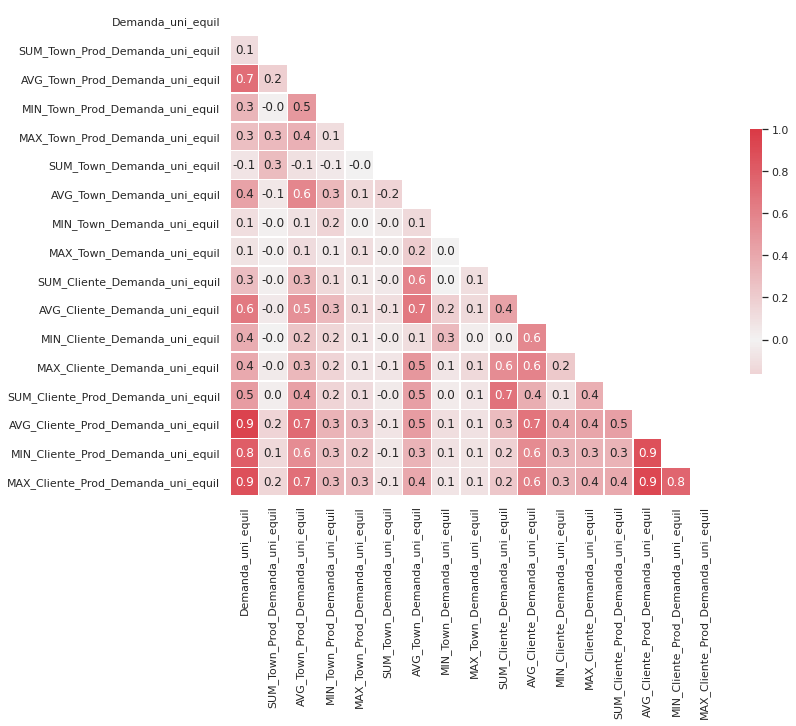

In [59]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df_sample.loc[:,cols].astype('float').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,fmt=".1f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [62]:
df = spark.read.format('parquet').load('data/tabelao_lag/')


In [63]:
df_sample = df.sample(fraction=0.01).toPandas()

df_sample.describe()

,Agencia_ID
count,104400.000000
mean,2494.679454
std,3965.234218
min,1110.000000
25%,1311.000000
50%,1613.000000
75%,2036.000000
max,25759.000000


In [64]:
cols = [i for i in df_sample.columns if i[-len('Demanda_uni_equil'):] in ['Demanda_uni_equil']]

In [65]:
df_sample.loc[:,cols].astype('float').describe().T

,count,mean,std,min,25%,50%,75%,max
Demanda_uni_equil,104400.0,7.149416,19.399733,0.0,2.0,3.0,6.0,1500.0
LAG_1_Cliente_Prod_Demanda_uni_equil,86980.0,7.792067,22.148396,0.0,2.0,4.0,7.0,2560.0
LAG_2_Cliente_Prod_Demanda_uni_equil,72026.0,8.557618,23.699028,0.0,2.0,4.0,8.0,2480.0
LAG_3_Cliente_Prod_Demanda_uni_equil,57499.0,9.485661,28.909319,0.0,2.0,4.0,9.0,3840.0
LAG_4_Cliente_Prod_Demanda_uni_equil,47358.0,10.518265,31.783990,0.0,2.0,5.0,10.0,3960.0
LAG_5_Cliente_Prod_Demanda_uni_equil,30807.0,12.532606,29.950452,0.0,3.0,5.0,11.5,900.0


In [67]:
df_sample.loc[:,cols].astype('float').corr()

,Demanda_uni_equil,LAG_1_Cliente_Prod_Demanda_uni_equil,LAG_2_Cliente_Prod_Demanda_uni_equil,LAG_3_Cliente_Prod_Demanda_uni_equil,LAG_4_Cliente_Prod_Demanda_uni_equil,LAG_5_Cliente_Prod_Demanda_uni_equil
Demanda_uni_equil,1.000000,0.857074,0.818040,0.823099,0.720053,0.883681
LAG_1_Cliente_Prod_Demanda_uni_equil,0.857074,1.000000,0.845696,0.884667,0.717754,0.869194
LAG_2_Cliente_Prod_Demanda_uni_equil,0.818040,0.845696,1.000000,0.844560,0.668249,0.832917
LAG_3_Cliente_Prod_Demanda_uni_equil,0.823099,0.884667,0.844560,1.000000,0.718513,0.887863
LAG_4_Cliente_Prod_Demanda_uni_equil,0.720053,0.717754,0.668249,0.718513,1.000000,0.866861
LAG_5_Cliente_Prod_Demanda_uni_equil,0.883681,0.869194,0.832917,0.887863,0.866861,1.000000


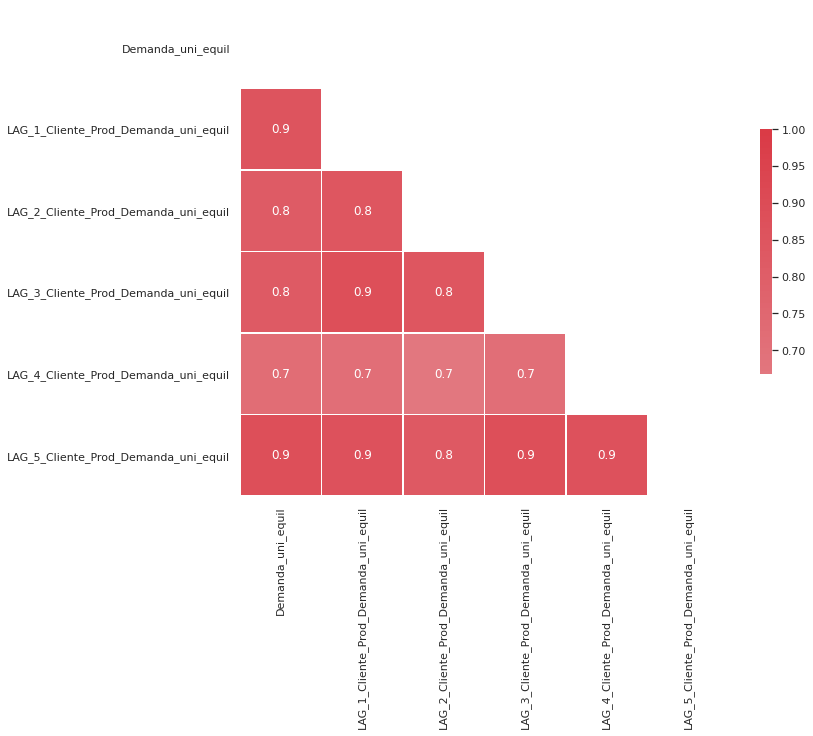

In [66]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df_sample.loc[:,cols].astype('float').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,fmt=".1f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df = spark.read.format('parquet').load('data/tabelao_over_part2/')
df_sample = df.sample(fraction=0.01).toPandas()

df_sample.describe()

In [ ]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
#rs = np.random.RandomState(33)
#d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = df_sample.loc[:,cols].astype('float').corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,annot=True,fmt=".1f",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})